# Practical 2  

In [3]:
import networkx as nx

# Read the edge list file manually and skip the first row
with open('data/Network for IC LT.txt') as file:
    lines = file.readlines()[1:]  # Skip the first row
G = nx.DiGraph()
for line in lines:
    source, target, _ = line.split()
    G.add_edge(source, target)

# Print Graph info
print(G)

DiGraph with 70409 nodes and 1031348 edges


In [4]:
G_hi = G.subgraph([node for node in G.nodes() if G.in_degree(node) > 150])

In [5]:
print(G_hi)

DiGraph with 256 nodes and 1703 edges


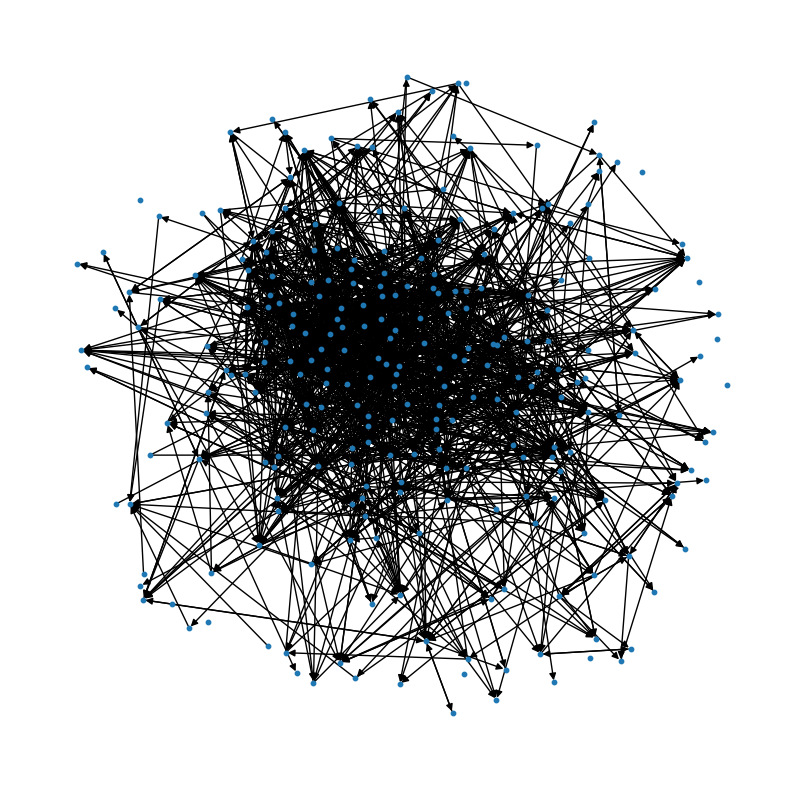

In [6]:
import matplotlib.pyplot as plt

pos = nx.spring_layout(G_hi, k=0.5)
plt.figure(figsize=(10, 10))
nx.draw_networkx(G_hi, pos, with_labels=False, node_size=10)
plt.axis('off')
plt.show()

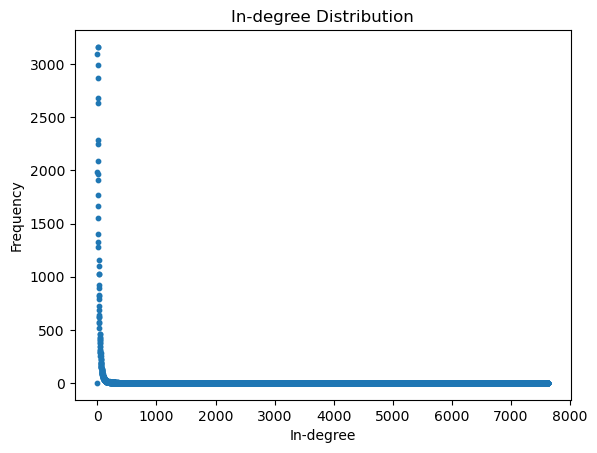

In [9]:
# Find the in-degree of each node
in_degrees = G.in_degree()



degree_dist = nx.degree_histogram(G)

# Plot the in-degree distribution
plt.scatter(range(len(degree_dist)), degree_dist, marker='o', s=10)
plt.xlabel('In-degree')
plt.ylabel('Frequency')
plt.title('In-degree Distribution')
plt.show()


In [10]:
degree_dist

[0,
 1988,
 3096,
 3162,
 3160,
 2996,
 2867,
 2685,
 2636,
 2251,
 2287,
 2090,
 1966,
 1909,
 1766,
 1664,
 1554,
 1401,
 1326,
 1279,
 1161,
 1098,
 1025,
 1029,
 918,
 889,
 787,
 824,
 821,
 722,
 687,
 635,
 617,
 563,
 620,
 570,
 520,
 461,
 461,
 428,
 424,
 417,
 393,
 401,
 373,
 373,
 339,
 314,
 308,
 344,
 295,
 281,
 249,
 290,
 277,
 251,
 229,
 227,
 212,
 194,
 170,
 178,
 188,
 185,
 191,
 147,
 149,
 171,
 144,
 159,
 147,
 120,
 133,
 131,
 105,
 112,
 124,
 108,
 102,
 113,
 86,
 94,
 86,
 96,
 77,
 101,
 87,
 92,
 82,
 74,
 69,
 67,
 68,
 65,
 68,
 62,
 54,
 56,
 59,
 68,
 45,
 49,
 64,
 60,
 43,
 50,
 58,
 38,
 46,
 38,
 49,
 42,
 35,
 48,
 34,
 37,
 30,
 31,
 33,
 28,
 28,
 28,
 25,
 36,
 25,
 31,
 30,
 20,
 24,
 22,
 19,
 25,
 27,
 21,
 25,
 18,
 23,
 25,
 28,
 23,
 15,
 22,
 26,
 18,
 23,
 20,
 16,
 11,
 24,
 14,
 13,
 11,
 12,
 19,
 15,
 18,
 11,
 10,
 12,
 8,
 19,
 13,
 13,
 16,
 12,
 11,
 12,
 10,
 10,
 16,
 16,
 10,
 16,
 8,
 12,
 10,
 11,
 11,
 13,
 9,
 

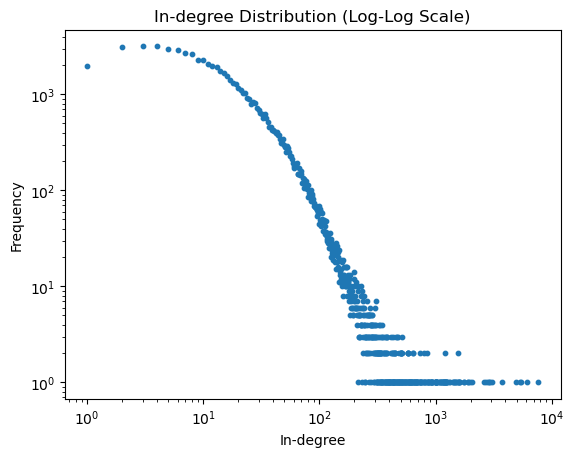

In [11]:
import matplotlib.pyplot as plt

# Plot the in-degree distribution on a log-log scale
plt.scatter(range(len(degree_dist)), degree_dist, marker='o', s=10)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('In-degree')
plt.ylabel('Frequency')
plt.title('In-degree Distribution (Log-Log Scale)')
plt.show()

Many network scientists (especially those from the physics community) get excited when they see a straight line on a log-log plot of the degree distribution, as this implies a “power law distribution”.
                    
$$
d(k) = k^{-\alpha}
$$

where $d(k)$ is the number of nodes of degree $k$ and $\alpha > 1$.   
We will encouter this phenomenon when studying preferential attachement random graphs (the “rich-get-richer phenomenon”).

/tmp/ipykernel_3244/68878058.py:8: RuntimeWarning: divide by zero encountered in log10
  log_degree_dist = np.log10(degree_dist)


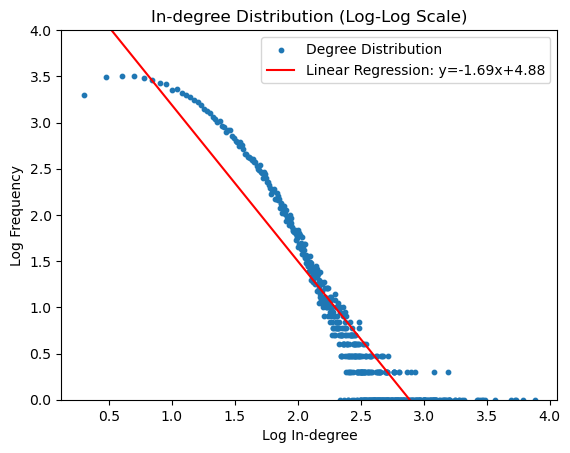

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Convert the degree distribution to numpy array
degree_dist = np.array(degree_dist)

# Calculate the logarithm of the degree distribution
log_degree_dist = np.log10(degree_dist)

# Calculate the logarithm of the degree values
log_degrees = np.log10(np.arange(1, len(degree_dist) + 1))  # Avoid log(0)

# Filter out invalid entries (e.g., -inf, NaN)
valid_indices = np.isfinite(log_degrees) & np.isfinite(log_degree_dist)
log_degrees = log_degrees[valid_indices]
log_degree_dist = log_degree_dist[valid_indices]

# Perform least squares linear regression
A = np.vstack([log_degrees, np.ones(len(log_degrees))]).T  # Create the matrix A for Ax = b
slope, intercept = np.linalg.lstsq(A, log_degree_dist, rcond=None)[0]  # Solve for x

# Plot the in-degree distribution on a log-log scale
plt.scatter(log_degrees, log_degree_dist, marker='o', s=10, label='Degree Distribution')

# Plot the linear regression line
regression_line = slope * log_degrees + intercept
plt.plot(log_degrees, regression_line, color='red', label=f'Linear Regression: y={slope:.2f}x+{intercept:.2f}')

# Plot details
plt.ylim(0, 4)
plt.xlabel('Log In-degree')
plt.ylabel('Log Frequency')
plt.title('In-degree Distribution (Log-Log Scale)')
plt.legend()
plt.show()


In [17]:
n = len(G.nodes())
m = len(G.edges())

edge_density = m / (n * (n - 1))
edge_density

0.00020804392877689116

In [22]:
# Calculate the average in-degree
avg_in_degree = sum(dict(G.in_degree()).values()) / len(G.nodes())

# Calculate the average out-degree
avg_out_degree = sum(dict(G.out_degree()).values()) / len(G.nodes())

avg_in_degree, avg_out_degree

(14.647956937323354, 14.647956937323354)

In [24]:
G_sub = G.subgraph([node for node in G.nodes() if G.in_degree(node) > 50])
print(G_sub)

DiGraph with 3363 nodes and 61313 edges


In [25]:
import networkx as nx

betweenness_centrality = nx.betweenness_centrality(G_sub, k=100)
top_10_vertices = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

print("Top 10 vertices with the highest betweenness centrality:")
for vertex, centrality in top_10_vertices:
    print(f"Vertex: {vertex}, Betweenness Centrality: {centrality}")

Top 10 vertices with the highest betweenness centrality:
Vertex: 5095, Betweenness Centrality: 0.042041105293196386
Vertex: 5124, Betweenness Centrality: 0.034172905308473556
Vertex: 4077, Betweenness Centrality: 0.024270581867023435
Vertex: 778, Betweenness Centrality: 0.023792169551109892
Vertex: 6690, Betweenness Centrality: 0.02292747042300335
Vertex: 9998, Betweenness Centrality: 0.022256916852965804
Vertex: 4874, Betweenness Centrality: 0.020712043334601138
Vertex: 6468, Betweenness Centrality: 0.020552613865041904
Vertex: 530, Betweenness Centrality: 0.01669775187456395
Vertex: 69, Betweenness Centrality: 0.014338628104946047


/tmp/ipykernel_3244/1513864609.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('cool')  # Use cool colormap


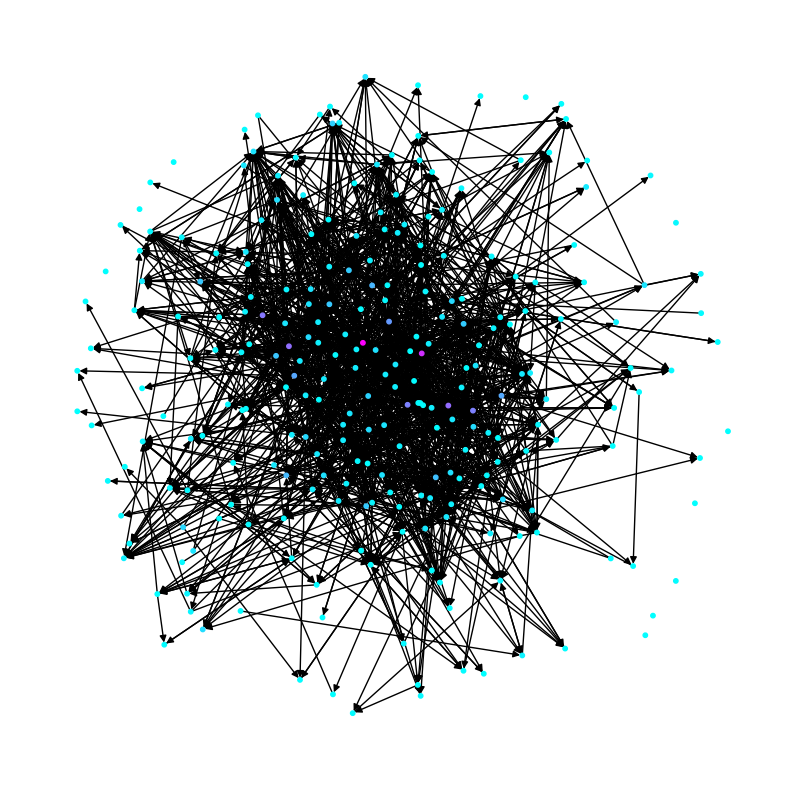

In [27]:
import networkx as nx
import matplotlib.pyplot as plt

# Calculate the betweenness centrality values for each node in G_hi
betweenness_values = {node: betweenness_centrality[node] for node in G_hi.nodes()}

# Define the color map for the nodes based on betweenness centrality
cmap = plt.cm.get_cmap('cool')  # Use cool colormap
node_colors = [betweenness_values[node] for node in G_hi.nodes()]

# Set up the figure and layout
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G_hi, k=0.5)

# Draw the subgraph G_hi with node colors
nx.draw_networkx(G_hi, pos, with_labels=False, node_color=node_colors, node_size=10, cmap=cmap)

# Remove the axis
plt.axis('off')

# Show the plot
plt.show()


In [28]:
import networkx as nx

eigenvector_centrality = nx.eigenvector_centrality(G_sub)

top_10_vertices = sorted(eigenvector_centrality.items(), key=lambda x: x[1], reverse=True)[:10]

print("Top 10 vertices with the highest eigenvector centrality:")
for vertex, centrality in top_10_vertices:
    print(f"Vertex: {vertex}, Eigenvector Centrality: {centrality}")


Top 10 vertices with the highest eigenvector centrality:
Vertex: 5668, Eigenvector Centrality: 0.1672184821851818
Vertex: 9998, Eigenvector Centrality: 0.15271634867735426
Vertex: 5122, Eigenvector Centrality: 0.13576287021917569
Vertex: 224, Eigenvector Centrality: 0.1330347060490648
Vertex: 6577, Eigenvector Centrality: 0.12763389230340136
Vertex: 9683, Eigenvector Centrality: 0.12744806702440825
Vertex: 1953, Eigenvector Centrality: 0.12623335565233312
Vertex: 10025, Eigenvector Centrality: 0.12393256180164453
Vertex: 8821, Eigenvector Centrality: 0.12337402483942442
Vertex: 9198, Eigenvector Centrality: 0.11533416025918926


/tmp/ipykernel_3244/3377934913.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('cool')  # Use cool colormap


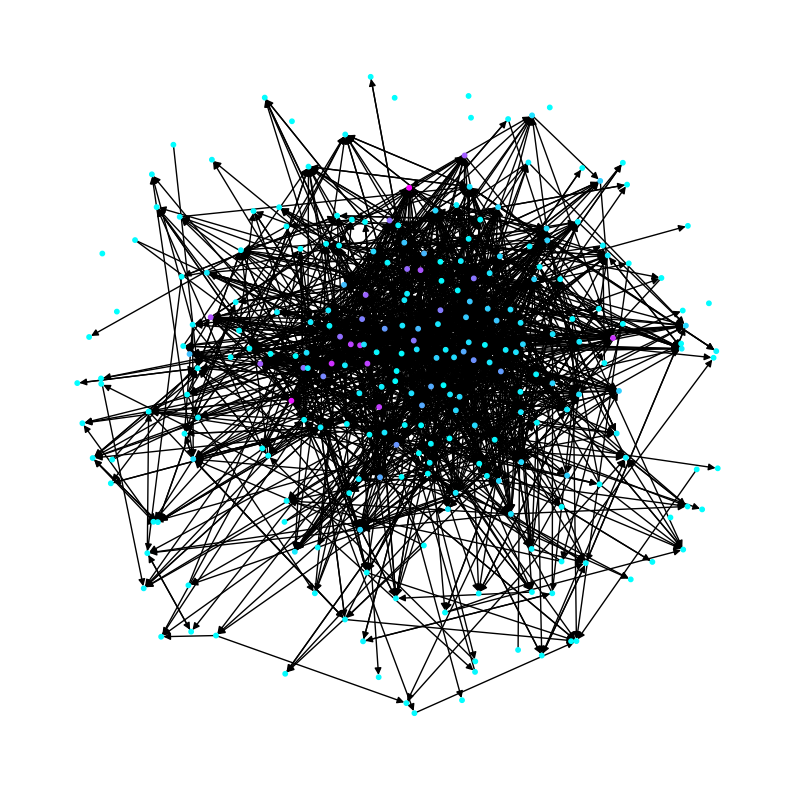

In [29]:
import networkx as nx

import matplotlib.pyplot as plt

# Calculate the eigenvector centrality values for each node in G_hi
eigenvector_values = {node: eigenvector_centrality[node] for node in G_hi.nodes()}

# Define the color map for the nodes based on eigenvector centrality
cmap = plt.cm.get_cmap('cool')  # Use cool colormap
node_colors = [eigenvector_values[node] for node in G_hi.nodes()]

# Set up the figure and layout
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G_hi, k=0.5)

# Draw the subgraph G_hi with node colors
nx.draw_networkx(G_hi, pos, with_labels=False, node_color=node_colors, node_size=10, cmap=cmap)

# Remove the axis
plt.axis('off')

# Show the plot
plt.show()


In [32]:
G_sub_ud = G_sub.to_undirected()
print(G_sub_ud)
# Calculate the number of triangles in the graph
num_triangles = sum(nx.triangles(G_sub_ud).values()) // 3
print(f"Number of triangles in the graph: {num_triangles}")

Graph with 3363 nodes and 50534 edges
Number of triangles in the graph: 115237


In [37]:
def count_2_paths(G):
    count = 0
    for v in G.nodes():
        # Get neighbors of node v (both predecessors and successors)
        neighbors = list(G.neighbors(v))
        
        # Count all pairs of neighbors (u, w) where there is a path u -> v -> w
        count += len(neighbors) * (len(neighbors) - 1) // 2  # Choose 2 neighbors from the list
        
    return count

In [39]:
num_2_path = count_2_paths(G_sub_ud)
print(f"Number of 2-paths in the graph: {num_2_path}")

Number of 2-paths in the graph: 3032527


In [40]:
cluster_coefficient = (3 * num_triangles) / num_2_path
cluster_coefficient

0.11400096355283894

In [41]:
cluster_coefficient = nx.transitivity(G_sub_ud)
cluster_coefficient

0.11400096355283894

In [42]:
import networkx as nx

average_cluster_coefficient = nx.average_clustering(G_sub_ud)
average_cluster_coefficient

0.13923914486332706

In [44]:
import networkx as nx

# Convert G_sub_ud to an undirected graph
G_sub_ud_undirected = G_sub_ud.to_undirected()

# Initialize variables
num_iterations = 20
cluster_coefficients = []

# Get degree sequence from the undirected graph
degree_sequence = [d for n, d in G_sub_ud_undirected.degree()]

# Calculate cluster coefficient for each iteration
for _ in range(num_iterations):
    # Generate a random graph with the same degree sequence as G_sub_ud_undirected
    random_graph = nx.configuration_model(degree_sequence, seed=None)

    # Convert the multigraph to a simple graph
    random_graph = nx.Graph(random_graph)  # Remove parallel edges
    random_graph.remove_edges_from(nx.selfloop_edges(random_graph))  # Remove self-loops

    # Calculate the cluster coefficient of the random graph
    cluster_coefficient = nx.average_clustering(random_graph)

    # Append the cluster coefficient to the list
    cluster_coefficients.append(cluster_coefficient)

# Calculate the average, minimum, and maximum cluster coefficients
average_cluster_coefficient = sum(cluster_coefficients) / num_iterations
min_cluster_coefficient = min(cluster_coefficients)
max_cluster_coefficient = max(cluster_coefficients)

average_cluster_coefficient, min_cluster_coefficient, max_cluster_coefficient


(0.030815466604802888, 0.029783727055557475, 0.03196228449913352)

Going by the simulation, the cluster coefficients of $G$ is larger than one would expect in a “randomly chosen graph with the same degree sequence” (configuration random graph model). 
That is, there are more triangles than one would expect. This is typical for social networks.